In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Entropy and the Boltzmann Distribution

Recall _entropy_, the measure of uncertainty about a system given its macroscopic properties (e.g., temperature, pressure, volume).  It measures how probability is spread over the possible _microstates_ of the system.

$$
S = -k\sum_\omega p_\omega \log p_\omega,
$$

where $\omega$ enumerates all possible microstates, and $p_\omega$ is the probability of the system occupying each state.  This is the _statistical mechanics_ definition of entropy.  The _thermodynamic_ definition of entropy $dS = \frac{\delta Q}{T}$ relating the change in entropy in a closed system to incremental and reversable transfer of heat $\delta Q$ into that system of temperature $T$.  Demanding these definitions be equal (and making use of the _fundamental thermodynamic relation_ $dU = T dS - p dV$) leads to the _Boltzmann distribution_ as the solution for describing the probability of a system occupying a particular microstate $\omega$ is

$$
p_\omega = \frac{e^{-E_\omega/kT}}{Z},
$$

where $Z$ the normalization constant resulting from summing the numerator over all possible microstates of the system $\Omega$

$$
Z = \sum_{\omega'\in \Omega}e^{-E_{\omega'}/kT}.
$$

## The Ising Model

We'll use the Boltzmann distribution above to simulate a ferromagnet using a simple, two-dimensional _Ising model_. This model constructs a ferromagnet as a 2-D lattice with $N$ sites, and the spin of each lattice site can be up or down, which we'll representent as $+1$ and $-1$, respectively.

A configuration of the microstate of this system is given by $\omega = \{\omega_1, \omega_2, \dots, \omega_N\}$, where $\omega_i=\pm 1$, meaning there are $|\Omega|=2^N$ possible microstates of the system.

Let's construct a small latice with random initial spins.

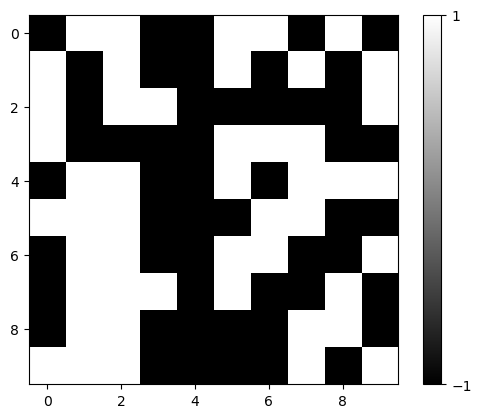

In [2]:
ngrid = 10
N = int(ngrid**2)

state = np.random.choice([-1, 1], size=(ngrid, ngrid))
plt.imshow(state, cmap='gray')
cbar = plt.colorbar()
cbar.set_ticks([-1, 1]);

We'll define the energy of a particular configuration to be

$$
E_\omega = -J\sum_{\left<i,j\right>}\omega_i\omega_j - H\sum_{i=1}^N\omega_i,
$$

where $\left<i,j\right>$ indicates adjacent (i.e., nearest neighbor) sites (vertically or horizontally), $J>0$ drives the strength of coupling between nearest-neighbors, and $H>0$ represents the strength of an external field.

In [3]:
def energy(state, J=1., H=0.):
    steps = [1, -1]
    axes = [0, 1]
    E = 0
    for step in steps:
        for axis in axes:
            E -= J * np.sum(state * np.roll(state, step, axis=axis))
    E -= H * np.sum(state)
    return E

In [4]:
energy(state)

-8.0

Now that we can calculate the energy of any particular microstate $\omega$, we can calculate the (relative) probability of occupying that state using the Boltzmann distribution.

In [5]:
def lnBoltz(state, kT=1., J=1., H=0.):
    return -energy(state, J=J, H=H)/kT